In [1]:
import pandas as pd
from transformers import BertTokenizer , BertModel

In [4]:
text_data_example = pd.read_csv('dianping.csv')['comment'].values.tolist()
text_data_example

['口味：不知道是我口高了，还是这家真不怎么样。\xa0我感觉口味确实很一般很一般。上菜相当快，我敢说菜都是提前做好的。几乎都不热。菜品：酸汤肥牛，干辣干辣的，还有一股泡椒味。着实受不了。。。环境：室内整体装修确实不错，但是大厅人多，太乱。服务：一般吧。说不上好，但是也不差。价格：一般，大众价格，都能接受。人：太多了，排队很厉害。以后不排队也许还会来（比如早去路过），排队就不值了。票据：六日没票！告我周一到周五可能有票~~~\xa0相当不正规，在这一点同等价位远不如外婆家。',
 '菜品丰富质量好，服务也不错！很喜欢！',
 '说真的，不晓得有人排队的理由，香精香精香精香精，拜拜！',
 '菜量实惠，上菜还算比较快，疙瘩汤喝出了秋日的暖意，烧茄子吃出了大阪烧的味道，想吃土豆片也是口感绵软停不下来，都是下饭好菜。唯一不足就是，锅包肉的面糊太厚了，略油腻。有机会再来。',
 '先说我算是娜娜家风荷园开业就一直在这里吃\xa0每次出去回来总想吃一回\xa0有时觉得外面的西式简餐总是不如天津的某些家和我口味\xa0毕竟有地区差异\xa0但是这家店是第一次去\xa0因为朋友要去的\xa0以前都去别家娜娜\xa0先说1点多20左右到的\xa0但是还是需要等位子的\xa0得知2点钟闭餐\xa0下午只有下午茶\xa0然后还没说话了\xa0门口的小哥就被告知什么我也不知道能等多久\xa0也许是好几桌一起走\xa0也许是一直坐着不走\xa0请问\xa0我有问吗\xa0我只是很客气的问问是不是2点闭餐就不能做主食了\xa0您了巴拉巴拉的跟我说这么多干什么\xa0要不是我朋友点的地方\xa0我肯定走\xa0然后到了位子\xa0知道您家的安排是无论几人轮到什么桌子都可以坐\xa0比如2人坐8人位也可以\xa0但是到我们明明有稍大一点的桌子\xa0还是给我们左手边最小的小咖啡桌\xa0经过协商才换的窗边的座位\xa0因为我要意面松饼\xa0沙拉\xa0薯泥什么的主食菜品小咖啡桌也不好放开\xa0还好毕竟后面的服务人员都还可以',
 '菜很好吃\xa0环境也不错\xa0\xa0\xa0值得推荐！！！！！！！！！！！！！！',
 '很喜欢的餐厅，东北风味儿，以后还会再去！',
 '口味属于家常菜一类，价格有点小贵，逛街的时候吃吃还可以。',
 '最近太忙了，估计要暂时告别大众点评一段时间了。这条应

In [5]:
def pretreatment(comments):
    result_comments = []
    punctuation ='。，？！：%&~（）、；“”&|,.?!:%&~();""'
    for comment in comments:
        comment = ''.join([c for c in comment if c not in punctuation])
        comment = ''.join(comment.split())   
        result_comments.append(comment)
    
    return result_comments

In [6]:
text_data_example_with_pretreat = pretreatment(text_data_example)
text_data_example_with_pretreat

['口味不知道是我口高了还是这家真不怎么样我感觉口味确实很一般很一般上菜相当快我敢说菜都是提前做好的几乎都不热菜品酸汤肥牛干辣干辣的还有一股泡椒味着实受不了环境室内整体装修确实不错但是大厅人多太乱服务一般吧说不上好但是也不差价格一般大众价格都能接受人太多了排队很厉害以后不排队也许还会来比如早去路过排队就不值了票据六日没票告我周一到周五可能有票相当不正规在这一点同等价位远不如外婆家',
 '菜品丰富质量好服务也不错很喜欢',
 '说真的不晓得有人排队的理由香精香精香精香精拜拜',
 '菜量实惠上菜还算比较快疙瘩汤喝出了秋日的暖意烧茄子吃出了大阪烧的味道想吃土豆片也是口感绵软停不下来都是下饭好菜唯一不足就是锅包肉的面糊太厚了略油腻有机会再来',
 '先说我算是娜娜家风荷园开业就一直在这里吃每次出去回来总想吃一回有时觉得外面的西式简餐总是不如天津的某些家和我口味毕竟有地区差异但是这家店是第一次去因为朋友要去的以前都去别家娜娜先说1点多20左右到的但是还是需要等位子的得知2点钟闭餐下午只有下午茶然后还没说话了门口的小哥就被告知什么我也不知道能等多久也许是好几桌一起走也许是一直坐着不走请问我有问吗我只是很客气的问问是不是2点闭餐就不能做主食了您了巴拉巴拉的跟我说这么多干什么要不是我朋友点的地方我肯定走然后到了位子知道您家的安排是无论几人轮到什么桌子都可以坐比如2人坐8人位也可以但是到我们明明有稍大一点的桌子还是给我们左手边最小的小咖啡桌经过协商才换的窗边的座位因为我要意面松饼沙拉薯泥什么的主食菜品小咖啡桌也不好放开还好毕竟后面的服务人员都还可以',
 '菜很好吃环境也不错值得推荐',
 '很喜欢的餐厅东北风味儿以后还会再去',
 '口味属于家常菜一类价格有点小贵逛街的时候吃吃还可以',
 '最近太忙了估计要暂时告别大众点评一段时间了这条应该是这个月的最后一条点评了全五星好评在天津连续下雨的某日我和实验室两人来到了南开区的大悦城直奔网红店小吊梨汤果然排队得人不多了以往不排队个半小时至一小时根本吃不上大厅基本已经坐满我们到了一个小的隔间里面隔间里面四张桌子待我们看过菜单之后才知道这家和天津老码头南京大牌档之类的馆子很相似都是以贩卖各种精致小吃为主分量不大一部分分量也很大但是味道很不错具体菜品就不多做介绍了我们也是按照大众点评推荐的前几个点的实话实说真的是味道不错大伙有兴趣可以试试

In [2]:
bert_tokenizer = BertTokenizer.from_pretrained("hfl/rbt3")
bert_model = BertModel.from_pretrained("hfl/rbt3")



bert_tokenizer = BertTokenizer.from_pretrained("hfl/chinese-roberta-wwm-ext-large")
bert_model = BertModel.from_pretrained("hfl/chinese-roberta-wwm-ext-large")

Downloading:   0%|          | 0.00/107k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/19.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/828 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/149M [00:00<?, ?B/s]

Some weights of the model checkpoint at hfl/rbt3 were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/107k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/19.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Some weights of the model checkpoint at hfl/chinese-roberta-wwm-ext-large were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [3]:
a = '我爱你中国！'
text = [a]

In [4]:
token_ids = bert_tokenizer(text,padding="max_length",truncation=True,max_length=512,return_tensors='pt')

In [5]:
feature_from_bert = bert_model(token_ids['input_ids'])

In [6]:
feature_from_bert['last_hidden_state'].shape

torch.Size([1, 512, 1024])

In [ ]:
token_ids = bert_tokenizer(text,padding="max_length",truncation=True,max_length=512,return_tensors='pt')
feature_from_bert = bert_model(token_ids['input_ids'])

In [1]:
import numpy as np
from sklearn.metrics import roc_auc_score

In [2]:
data = np.load('fold5_from_swufe_bert.npz', allow_pickle=True)['arr_1']

In [3]:
data.shape

(1000, 512)

In [8]:
zero = np.zeros(512)
ones = np.ones(512)

In [9]:
for i in range(1000):
    if np.array_equal(data[i],zero):
        print(i)

In [10]:
for i in range(1000):
    if np.array_equal(data[i],ones):
        print(i)

In [11]:
pred = np.random.random_sample((1000,512))

In [7]:
np.unique(data)

array([0., 1.])

In [12]:
average="macro"
sample_weight=None
max_fpr=None
multi_class="raise"
labels=None

In [13]:
from sklearn.utils.validation import check_array
from sklearn.utils.multiclass import type_of_target
# from sklearn.preprocessing._label import label_binarize

In [14]:
type_of_target(data)

'multilabel-indicator'

In [15]:
y_true = check_array(data, ensure_2d=False, dtype=None)
y_true

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
y_score = check_array(pred, ensure_2d=False)
y_score

array([[0.50411233, 0.98710751, 0.6243306 , ..., 0.98290949, 0.47399592,
        0.48251791],
       [0.1577082 , 0.20772369, 0.25213931, ..., 0.72168038, 0.09475791,
        0.49970162],
       [0.83708632, 0.31378157, 0.98609453, ..., 0.30226725, 0.4957367 ,
        0.20900583],
       ...,
       [0.88166152, 0.14194259, 0.4334126 , ..., 0.71337801, 0.35258904,
        0.09232232],
       [0.02427284, 0.62883764, 0.03379038, ..., 0.43998239, 0.94332724,
        0.72272839],
       [0.50957342, 0.07372428, 0.66380828, ..., 0.00201608, 0.41744988,
        0.12219597]])

In [24]:
from functools import partial
from sklearn.metrics._ranking import _binary_roc_auc_score

In [18]:
len(np.unique(y_true))

2

In [20]:
for batch in range(20):
    y_select = y_true[batch*50:(batch+1)*50]
    if len(np.unique(y_select))!=2:
        print(batch)

In [21]:
from sklearn.metrics._base import _average_binary_score

In [25]:
_average_binary_score(partial(_binary_roc_auc_score, max_fpr=max_fpr),
                     y_true,
                     y_score,
                     average,
                     sample_weight=sample_weight)

0.4980780000589197

In [28]:
roc_auc_score(data,pred)

0.4980780000589197

In [31]:
auc = 0
for news in range(1000):
    auc += roc_auc_score(data[news].reshape(512,1), pred[news].reshape(512,1))
print(auc/1000)

0.499159949550334


In [32]:
roc_auc_score(data.reshape(-1,1), pred.reshape(-1,1))

0.4993232782239045

In [45]:
from matplotlib import pyplot as plt
import numpy as np

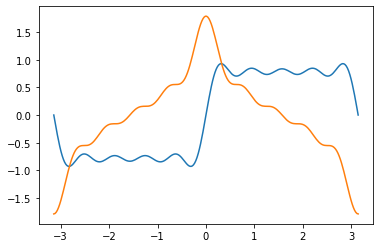

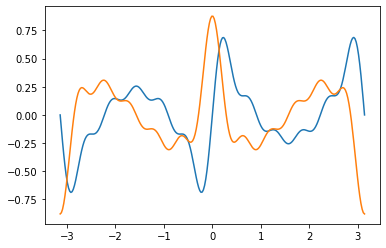

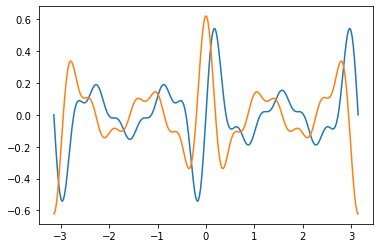

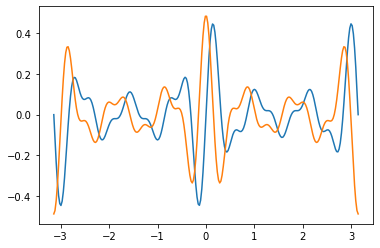

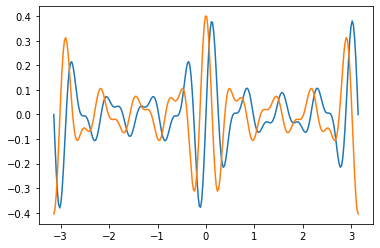

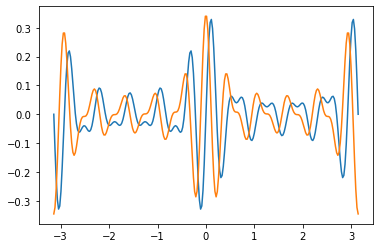

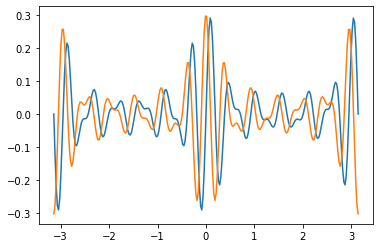

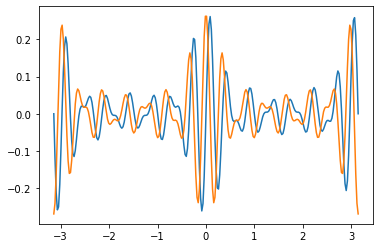

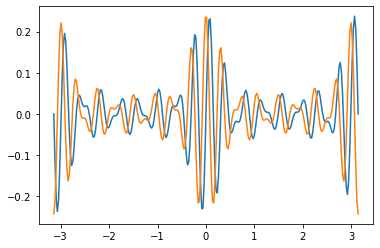

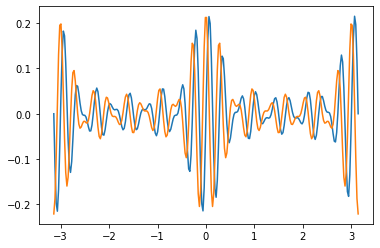

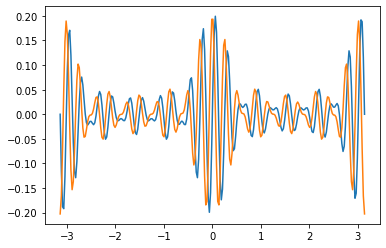

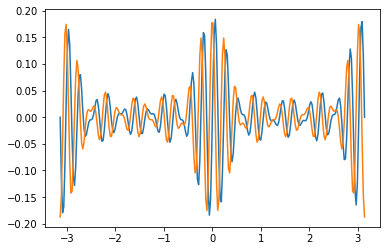

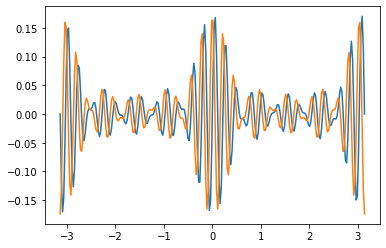

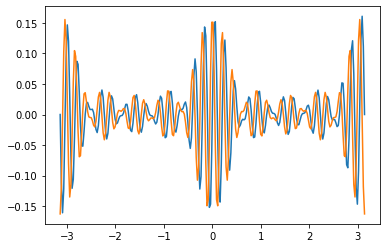

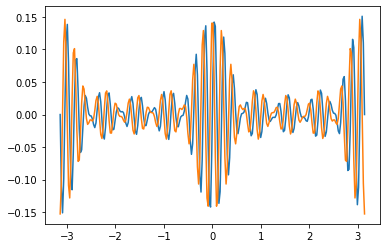

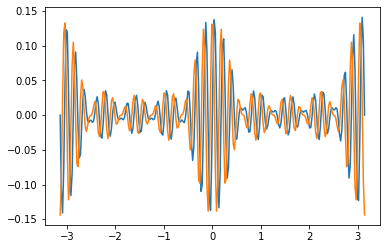

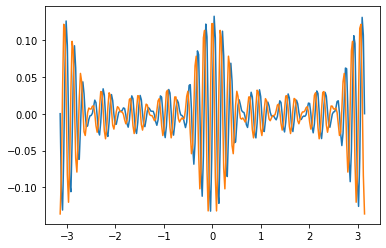

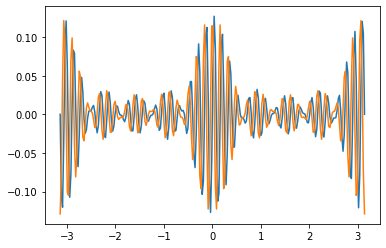

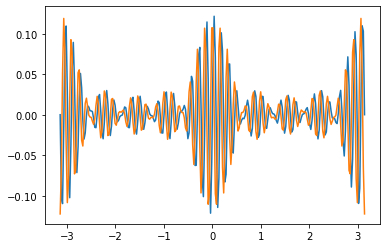

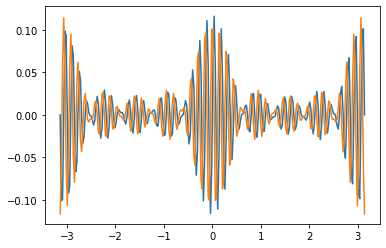

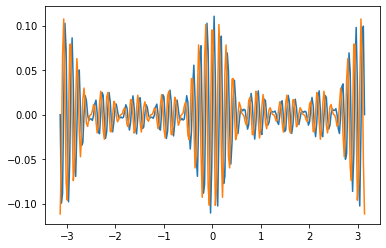

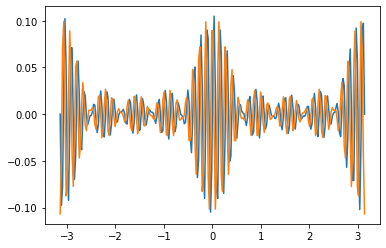

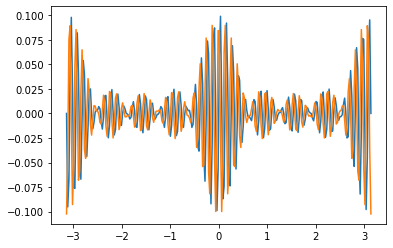

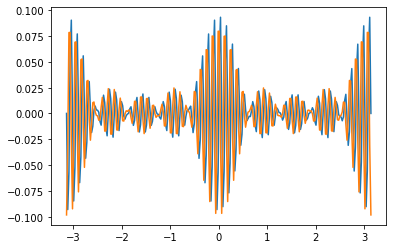

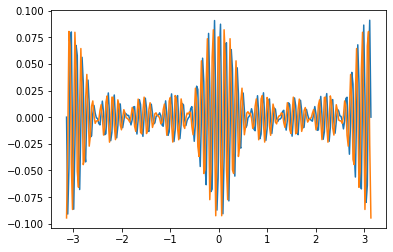

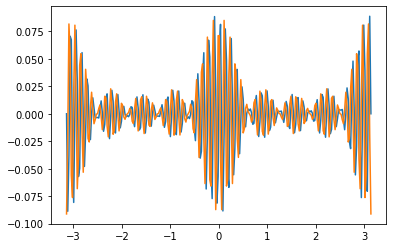

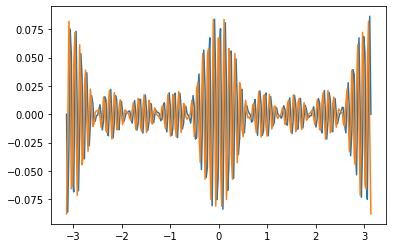

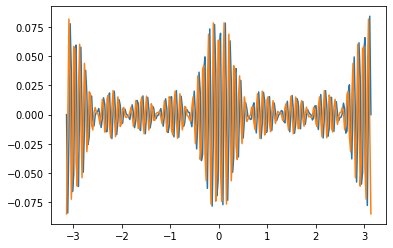

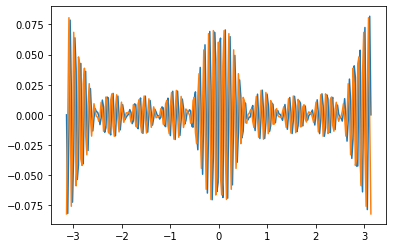

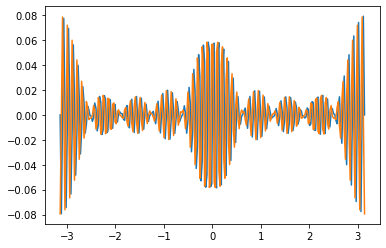

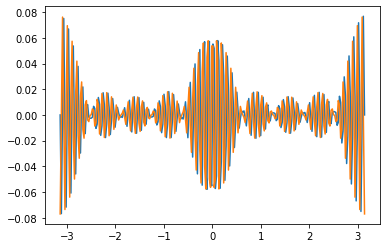

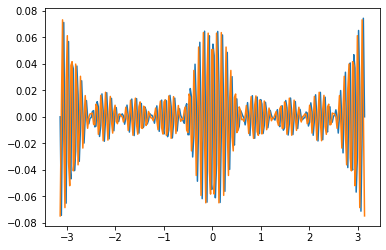

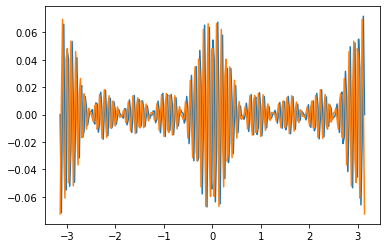

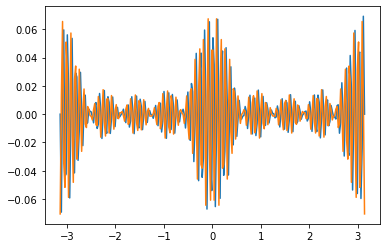

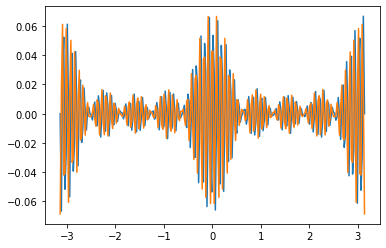

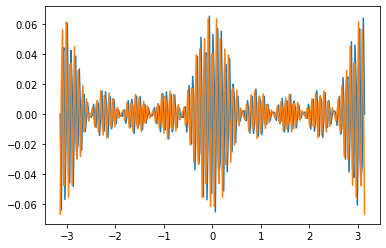

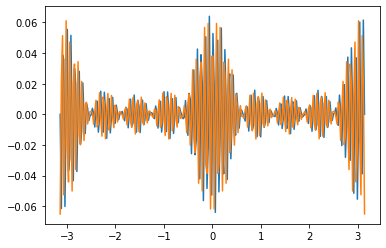

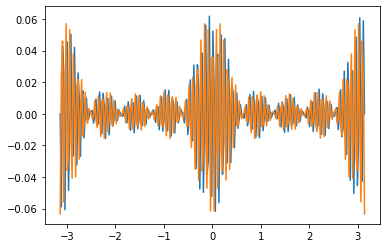

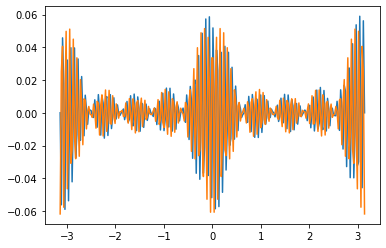

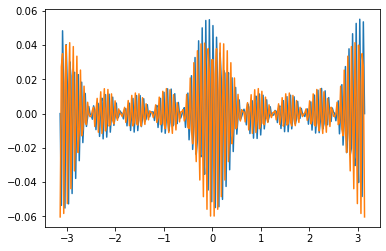

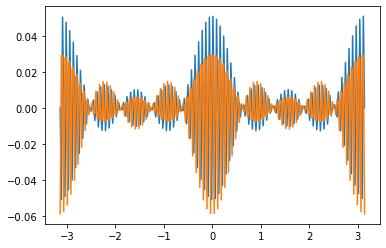

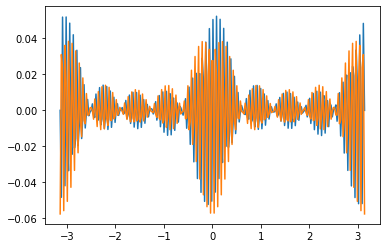

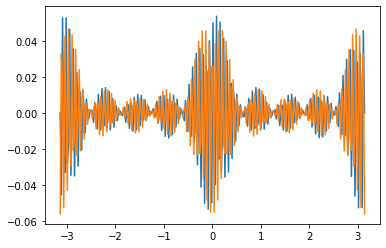

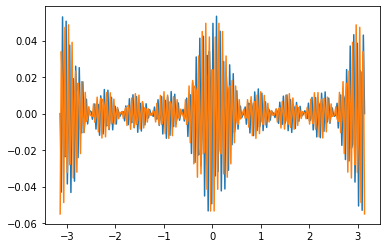

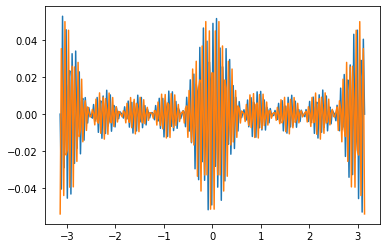

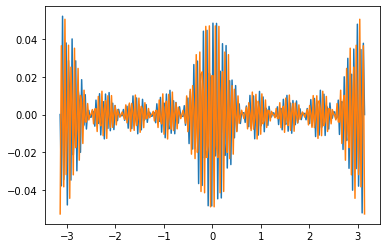

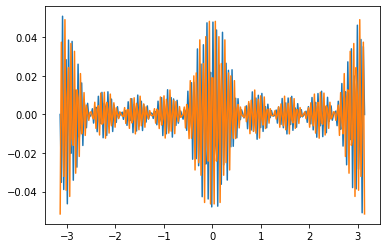

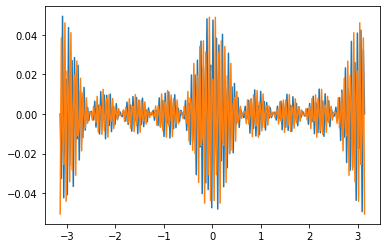

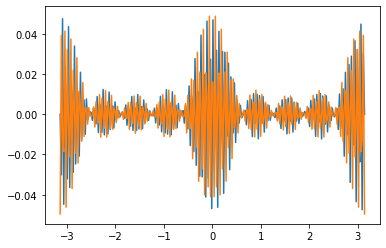

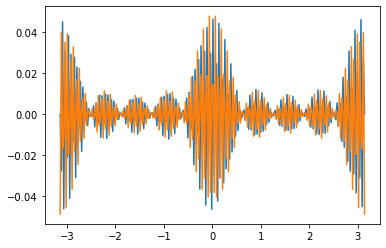

In [55]:
x = np.linspace(-np.pi,np.pi,256,endpoint=True)
for w in list(range(1,100,2)):
    y = (np.sin(w*x))/w+(np.sin((w+2)*x))/(w+2)+(np.sin((w+4)*x))/(w+4)+(np.sin((w+6)*x))/(w+6)+(np.sin((w+8)*x))/(w+8)
    z = (np.cos(w*x))/w+(np.cos((w+2)*x))/(w+2)+(np.cos((w+4)*x))/(w+4)+(np.cos((w+6)*x))/(w+6)+(np.cos((w+8)*x))/(w+8)
    plt.plot(x,y)
    plt.plot(x,z)
    plt.show()